In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def process_entanglement_data(file_path, basis):
    
    # Step 1: Read the data
    df = pd.read_csv(file_path, delimiter=r'\s+', comment='#', 
                     names=["Time (s)", "Single 0 (/s)", "Single 2 (/s)", "Coincidence 02 (/s)"])
    
    # Step 2: Replace time column values with the basis and rename the column
    df["Time (s)"] = basis
    df.rename(columns={"Time (s)": f"Computational_basis_{basis}"}, inplace=True)
    
    # Step 3: Calculate accidental coincidence
    df["Accidental_Coincidence"] = 2 * df["Single 0 (/s)"] * df["Single 2 (/s)"] * 20 * 10**-9
    
    # Step 4: Calculate actual coincidence
    df["Actual Coincidence"] = (df["Coincidence 02 (/s)"] - df["Accidental_Coincidence"]).round().astype(int)
    
    # Step 5: Calculate average of actual coincidences
    N_basis = df["Actual Coincidence"].mean().round().astype(int)
    
    print(f"\nProcessed DataFrame for basis {basis}:")
    #print(df)
    print(f"Average Actual Coincidence (N[{basis}]): {N_basis}")
    
    return N_basis


In [3]:
def calculate_visibility(file_paths):
    
    # Calculate N values for each basis
    N_values = {}
    for basis, path in file_paths.items():
        N_values[basis] = process_entanglement_data(path, basis)
    
    # Computational Basis Calculations
    Imax_comp = N_values["HH"] + N_values["VV"]
    Imin_comp = N_values["HV"] + N_values["VH"]
    # Calculate Visibility
    visibility_comp = (Imax_comp - Imin_comp) / (Imax_comp + Imin_comp)
        
    print(f"\n--- Computational Basis ---")
    print(f"Imax = N[HH] + N[VV] = {N_values['HH']} + {N_values['VV']} = {Imax_comp}")
    print(f"Imin = N[HV] + N[VH] = {N_values['HV']} + {N_values['VH']} = {Imin_comp}")
    print(f"Visibility = (Imax - Imin) / (Imax + Imin) = ({Imax_comp} - {Imin_comp}) / ({Imax_comp} + {Imin_comp}) = {visibility_comp:.4f}")
    
    # Diagonal Basis Calculations
    Imax_diag = N_values["DD"] + N_values["AA"]
    Imin_diag = N_values["DA"] + N_values["AD"]
    # Calculate Visibility
    visibility_diag = (Imax_diag - Imin_diag) / (Imax_diag + Imin_diag)
    
    print(f"\n--- Diagonal Basis ---")
    print(f"Imax = N[DD] + N[AA] = {N_values['DD']} + {N_values['AA']} = {Imax_diag}")
    print(f"Imin = N[DA] + N[AD] = {N_values['DA']} + {N_values['AD']} = {Imin_diag}")
    print(f"Visibility = (Imax - Imin) / (Imax + Imin) = ({Imax_diag} - {Imin_diag}) / ({Imax_diag} + {Imin_diag}) = {visibility_diag:.4f}")
    
    # Return results in a structured format
    results = {
        "Computational Basis": {
            "Imax": Imax_comp,
            "Imin": Imin_comp,
            "Visibility": visibility_comp,
        },
        "Diagonal Basis": {
            "Imax": Imax_diag,
            "Imin": Imin_diag,
            "Visibility": visibility_diag,
        },
        "N_Values": N_values,
    }  
    
    return results


In [4]:
# Example usage
file_paths = {
    "HH": "G:/Semester 4/Lab data/Final project data/12.5cm data/New folder (2)/Distribution visbility with correction/quCNT_28.txt",
    "HV": "G:/Semester 4/Lab data/Final project data/12.5cm data/New folder (2)/Distribution visbility with correction/quCNT_29.txt",
    "VV": "G:/Semester 4/Lab data/Final project data/12.5cm data/New folder (2)/Distribution visbility with correction/quCNT_30.txt",
    "VH": "G:/Semester 4/Lab data/Final project data/12.5cm data/New folder (2)/Distribution visbility with correction/quCNT_31.txt",
    "DD": "G:/Semester 4/Lab data/Final project data/12.5cm data/New folder (2)/Distribution visbility with correction/quCNT_32.txt",
    "DA": "G:/Semester 4/Lab data/Final project data/12.5cm data/New folder (2)/Distribution visbility with correction/quCNT_33.txt",
    "AA": "G:/Semester 4/Lab data/Final project data/12.5cm data/New folder (2)/Distribution visbility with correction/quCNT_34.txt",
    "AD": "G:/Semester 4/Lab data/Final project data/12.5cm data/New folder (2)/Distribution visbility with correction/quCNT_35.txt"
}


In [5]:
results = calculate_visibility(file_paths)

# Access results for computational basis
comp_basis = results["Computational Basis"]
print(f"\nComputational Basis Visibility: {comp_basis['Visibility']:.4f}")

# Access results for diagonal basis
diag_basis = results["Diagonal Basis"]
print(f"\nDiagonal Basis Visibility: {diag_basis['Visibility']:.4f}")


Processed DataFrame for basis HH:
Average Actual Coincidence (N[HH]): 73

Processed DataFrame for basis HV:
Average Actual Coincidence (N[HV]): 22

Processed DataFrame for basis VV:
Average Actual Coincidence (N[VV]): 219

Processed DataFrame for basis VH:
Average Actual Coincidence (N[VH]): 10

Processed DataFrame for basis DD:
Average Actual Coincidence (N[DD]): 141

Processed DataFrame for basis DA:
Average Actual Coincidence (N[DA]): 17

Processed DataFrame for basis AA:
Average Actual Coincidence (N[AA]): 159

Processed DataFrame for basis AD:
Average Actual Coincidence (N[AD]): 18

--- Computational Basis ---
Imax = N[HH] + N[VV] = 73 + 219 = 292
Imin = N[HV] + N[VH] = 22 + 10 = 32
Visibility = (Imax - Imin) / (Imax + Imin) = (292 - 32) / (292 + 32) = 0.8025

--- Diagonal Basis ---
Imax = N[DD] + N[AA] = 141 + 159 = 300
Imin = N[DA] + N[AD] = 17 + 18 = 35
Visibility = (Imax - Imin) / (Imax + Imin) = (300 - 35) / (300 + 35) = 0.7910

Computational Basis Visibility: 0.8025

Diagon

# Plotting

In [7]:
def plot_actual_coincidences(N_values):
    # Separate bases into computational and diagonal groups
    comp_bases = ["HH", "HV", "VV", "VH"]
    diag_bases = ["DD", "DA", "AA", "AD"]
    
    missing_bases = [basis for basis in comp_bases + diag_bases if basis not in N_values]
    if missing_bases:
        raise KeyError(f"Missing keys in N_values: {missing_bases}")
    
    # Extract values for computational and diagonal bases
    comp_values = [N_values[basis] for basis in comp_bases]
    diag_values = [N_values[basis] for basis in diag_bases]
    
    # Set the visual style
    sns.set_theme(style="darkgrid")

    # Plot computational basis
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    bars_comp = plt.bar(comp_bases, comp_values, color=["#3498db", "#2ecc71", "#f39c12", "#e74c3c"], edgecolor="black", linewidth=1.5)
    plt.title("Averaged Actual Coincidences of Computational Bases", fontsize=16, fontweight="bold", color="#2c3e50")
    plt.xlabel("Computational Bases_Bandpass", fontsize=14, fontweight="bold")
    plt.ylabel("Averaged Actual Coincidence", fontsize=14, fontweight="bold")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Plot diagonal basis
    plt.subplot(1, 2, 2)
    bars_diag = plt.bar(diag_bases, diag_values, color=["#9b59b6", "#1abc9c", "#e74c3c", "#f1c40f"], edgecolor="black", linewidth=1.5)
    plt.title("Averaged Actual Coincidences of Diagonal Bases", fontsize=16, fontweight="bold", color="#2c3e50")
    plt.xlabel("Diagonal Basis_Bandpass", fontsize=14, fontweight="bold")
    plt.ylabel("Averaged Actual Coincidence", fontsize=14, fontweight="bold")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


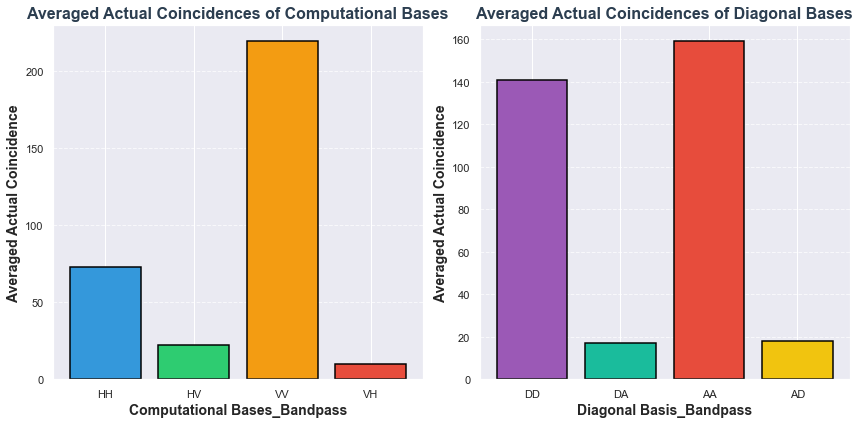

In [8]:
N_values = results["N_Values"]
plot_actual_coincidences(N_values)

In [12]:
from colorama import Fore, Style

def print_fancy_results_with_styles(results):
    """
    Print results with emphasis on visibility shown at the top in bold and bright green.
    """
    print("\n" + "=" * 60)
    print(Style.BRIGHT + Fore.CYAN + f"{'VISIBILITY RESULTS_Bandpass':^60}" + Style.RESET_ALL)
    print("=" * 60)
    
    # Computational Basis
    comp_basis = results["Computational Basis"]
    print(Fore.YELLOW + Style.BRIGHT + "\n--- COMPUTATIONAL BASIS ---" + Style.RESET_ALL)
    print(Fore.GREEN + Style.BRIGHT + f"{'Visibility':<20}: {comp_basis['Visibility']:.4f}" + Style.RESET_ALL)
    print(Style.DIM + f"{'Imax':<20}: {comp_basis['Imax']}" + Style.RESET_ALL)
    print(Style.DIM + f"{'Imin':<20}: {comp_basis['Imin']}" + Style.RESET_ALL)
    
    print("\n" + "-" * 60)
    
    # Diagonal Basis
    diag_basis = results["Diagonal Basis"]
    print(Fore.YELLOW + Style.BRIGHT + "\n--- DIAGONAL BASIS ---" + Style.RESET_ALL)
    print(Fore.GREEN + Style.BRIGHT + f"{'Visibility':<20}: {diag_basis['Visibility']:.4f}" + Style.RESET_ALL)
    print(Style.DIM + f"{'Imax':<20}: {diag_basis['Imax']}" + Style.RESET_ALL)
    print(Style.DIM + f"{'Imin':<20}: {diag_basis['Imin']}" + Style.RESET_ALL)

    print("=" * 60)

    # Print results in fancy style
print_fancy_results_with_styles(results)



                VISIBILITY RESULTS_Bandpass                 

--- COMPUTATIONAL BASIS ---
Visibility          : 0.8025
Imax                : 292
Imin                : 32

------------------------------------------------------------

--- DIAGONAL BASIS ---
Visibility          : 0.7910
Imax                : 300
Imin                : 35
